In [1]:
import pandas as pd
import numpy as np
data1=pd.read_csv('df10_3.csv')
data1.head()

,id,js,fz,temp_max,bc,bc_2,temp,ms,temp_change
0,183,182,11.351351,500959269,-380,0,223437084.1,0,0.000000e+00
1,184,183,11.520548,500959270,-380,0,212773854.0,1,1.996170e-09
2,185,184,11.597222,500959268,-380,0,222684990.9,2,-3.992340e-09
3,186,185,9.753425,500959267,-380,0,199050736.8,3,-1.996170e-09
4,187,186,11.108108,500959267,-380,0,236974750.6,4,0.000000e+00


In [2]:
data1.drop(['id','js','temp','bc','temp_change'], axis=1,inplace=True)
data1.head()

,fz,temp_max,bc_2,ms
0,11.351351,500959269,0,0
1,11.520548,500959270,0,1
2,11.597222,500959268,0,2
3,9.753425,500959267,0,3
4,11.108108,500959267,0,4


In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(21)
target = data1['ms']
data1.drop('ms', axis=1, inplace=True)
train_data, val_data, train_y, val_y = train_test_split(
    data1, target, train_size=0.8, random_state=21
)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
train_data

,fz,temp_max,bc_2
1741,13.000000,500959273,-26
1069,11.547945,500959281,-12
426,12.878378,500959270,-16
1916,12.643836,500959273,-12
1135,10.369863,500959276,-20
270,11.698630,500959270,-22
332,11.438356,500959274,-26
1820,11.810811,500959280,-38
110,10.602740,500959273,-22
1275,12.698630,500959279,-13


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def simple_linear_model(train_data, train_y, val_data, val_y, input_feature):
    reg = LinearRegression()
    reg.fit(train_data.as_matrix(columns=[input_feature]), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=[input_feature]))
    ) ** 0.5
    return RMSE

In [6]:
estimate_result = pd.DataFrame(columns=['feature', 'Val_RMSE'])

np.random.seed(21)

for feature in train_data.columns:
    RMSE = simple_linear_model(train_data, train_y, val_data, val_y, feature)
    estimate_result = estimate_result.append({'feature': feature, 'Val_RMSE': RMSE}, ignore_index=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [7]:
estimate_result.sort_values(by='Val_RMSE').head(3)

,feature,Val_RMSE
2,bc_2,58.240768
1,temp_max,90.184668
0,fz,90.831615


In [8]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)

def regression_model(reg, train_data, train_y, val_data, val_y, input_feature):
    reg.fit(train_data.as_matrix(columns=input_feature), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=input_feature))
    ) ** 0.5
    return reg, RMSE

ridge = Ridge()
dt_gre = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
ridge, RMSE = regression_model(ridge, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for ridge_regression is %s' % RMSE)
dt_gre, RMSE = regression_model(dt_gre, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for DecisionTreeRegressor is %s' % RMSE)
rf_reg, RMSE = regression_model(rf_reg, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for RandomForestRegressor is %s' % RMSE)

RMSE for ridge_regression is 58.23707534870897
RMSE for DecisionTreeRegressor is 48.21177980795474
RMSE for RandomForestRegressor is 41.84867426379924


D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 1

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
test_y=pd.read_csv('ms.csv')
test_data=pd.read_csv('ms_test.csv')
test_y

,ms
0,110
1,111
2,112
3,113
4,114
5,115
6,116
7,117
8,118
9,119


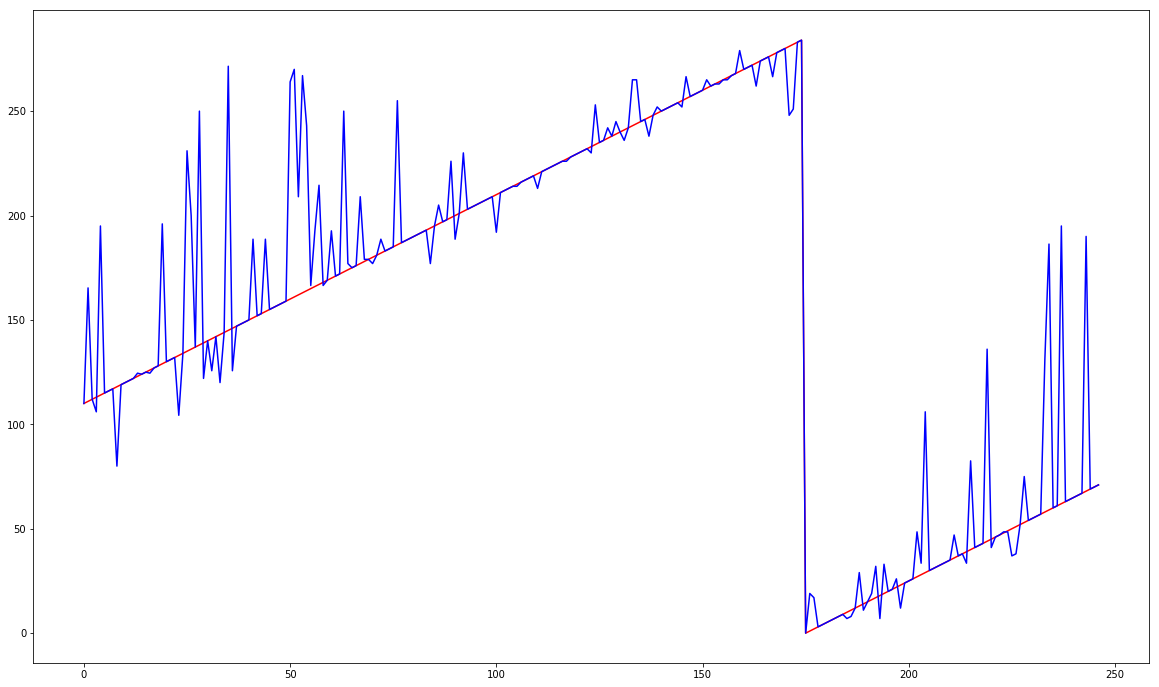

In [11]:
plt.figure(figsize=(20,12))
plt.plot(test_y,c='red')
plt.plot(dt_gre.predict(test_data),c='blue')

plt.show()

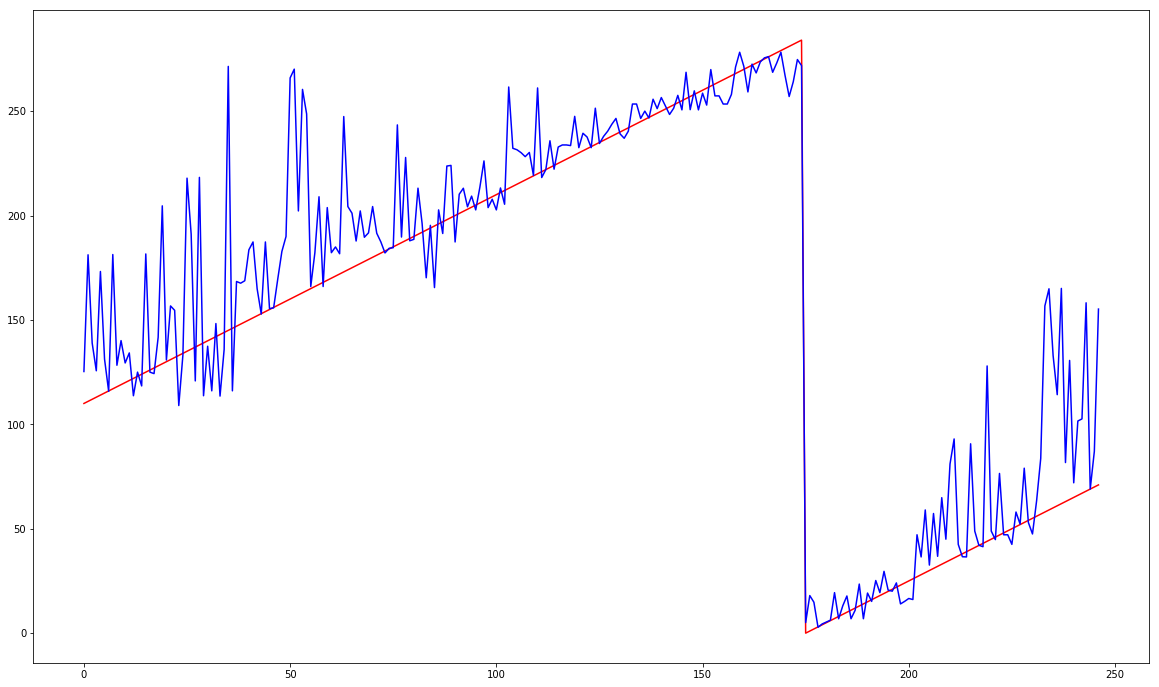

In [12]:
plt.figure(figsize=(20,12))
plt.plot(test_y,c='red')
plt.plot(rf_reg.predict(test_data),c='blue')
plt.show()

In [13]:
rf_reg.score(test_data,test_y)

0.8753685215159073

In [22]:
ridge.predict()

TypeError: predict() missing 1 required positional argument: 'X'